# Time Series Data Stationarity

Time series is different from more traditional classification and regression predictive modeling problems. The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically.

When modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as `stationarity`.

These assumptions can be easily violated in time series by the addition or a trend, seasonality, and other time-dependent structures.

After completing this tutorial, you will know:
- How to identify obvious stationary and non-stationary time series using line plot.
- How to spot check summary statistics like mean and variance for a change over time.
- How to use statistical tests with statistical significance to check if a time series is stationary.

# Stationary Time Series

The observations in a stionary time series are not dependent on time. They are not affected by trend or seasons. Summary statistics calculated on the time series are consistent over time, like the mean of the variance of the observations.

Statistical modeling methods assume or require the time series to be stationary to be effective.

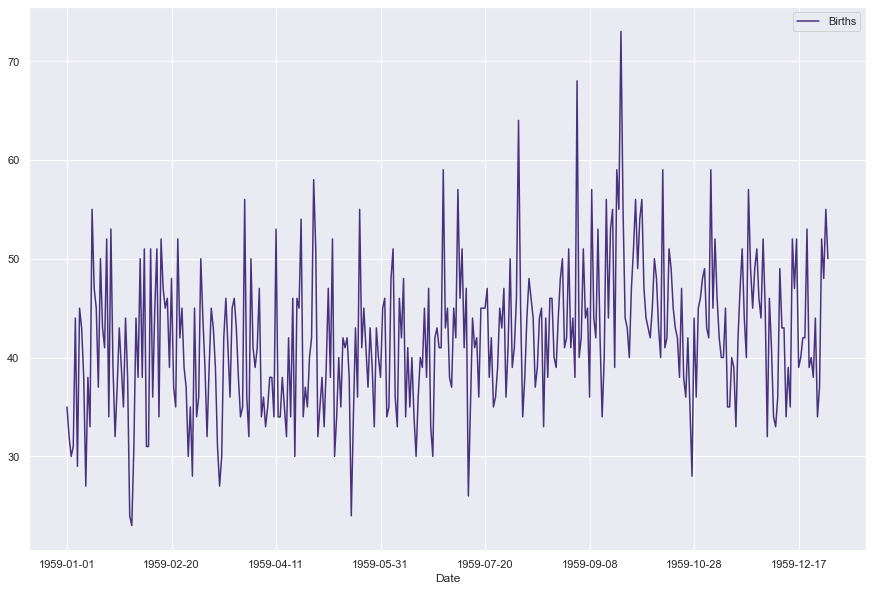

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='viridis')

data = pd.read_csv('./res/data/daily_total_female_births.csv', header=0, index_col=0)
data.plot(figsize=(15,10))
plt.show()

## Non-Stationary Time Series

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index. Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and seasonal effects.

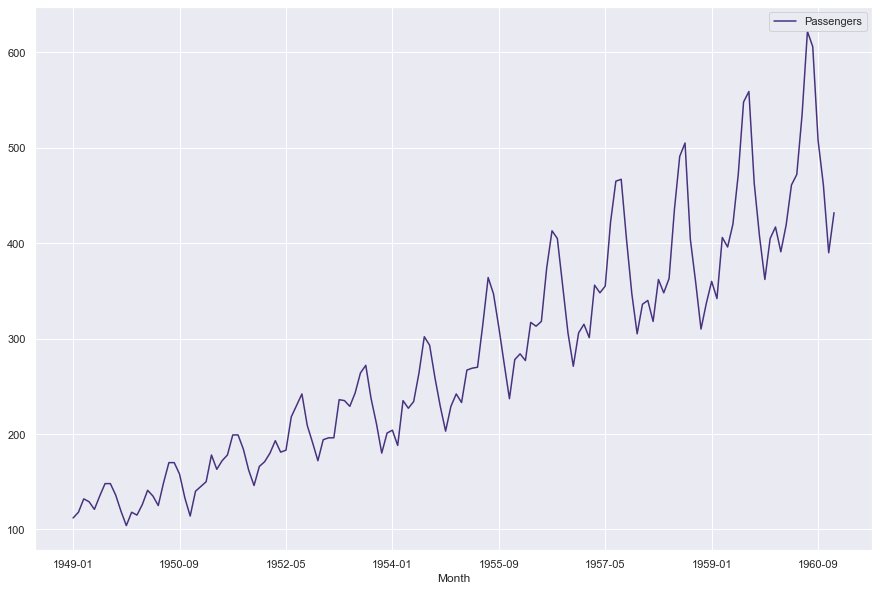

In [7]:
data = pd.read_csv('./res/data/airline_passengers.csv', header=0, index_col=0)
data.plot(figsize=(15,10))
plt.show()

## Types of Stationary Time Series

The notion of stationarity comes from the theoretical study of time series and it is a useful abstraction when forecasting. There are some finer-grained notions of stationarity that you may come across if you dive deeper into this topic.

They are:
- `stationary process` : A process that generates a stationary series of observations.
- `stationary model` : A model that describes a stationary series of observations.
- `trend stationary` : A time series that does not exhibit a trend.
- `seasonal stationary` : A time series that does not exhibit seasonality.
- `strictly stationary` : A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

# Stationary Time Series and Forecasting

Should you make your time series stationary? **Generally, yes.**

If you have clear trends and seasonalities in your time series, then model these components, remove them from observations, then train models on the residuals. Statistical time series methods and even modern machine learning methods will benefit from the clearer signal in the data.

However, we turn to machine learning methods when the classical methods fail (i.e., when we want more or better results). We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when  working with non-stationary observations or some mixture of stationary and non-stationary views of the problem.

The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.

# Summary Statistics

A quick and dirty check to see if your time series is non-stationary is to review summary statistics.

You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

## Daily Births Dataset

Because we are looking at the mean and variance, we are assuming that the data conforms to a Gaussian distribution.

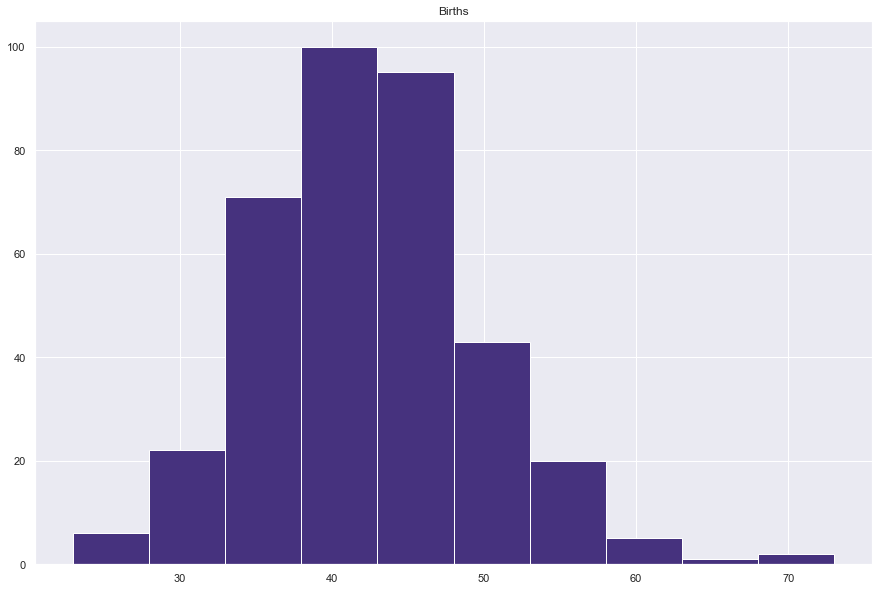

In [71]:
data = pd.read_csv('./res/data/daily_total_female_births.csv', header=0, index_col=0)
data.hist(figsize=(15,10))
plt.show()

We clearly see the bell curve-like shape of the Gaussian distribution with a longer right tail. Now split it into two contiguous but independent sets of numbers and compare the values.

In [72]:
# split the data into 2 evenly
x = data.values
split = round(len(x) /2 )
x1, x2 = x[0:split], x[split:]

In [73]:
#calculate the summary statistics
mean1 = x1.mean()
mean2 = x2.mean()
var1 = x1.var()
var2 = x2.var()

#print results
print(f'mean1: {mean1}, mean2: {mean2}')
print(f'variance1: {var1}, variance2: {var2}')

mean1: 39.76373626373626, mean2: 44.185792349726775
variance1: 49.21341021615746, variance2: 48.708650601690096


## Airline Passengers Dataset

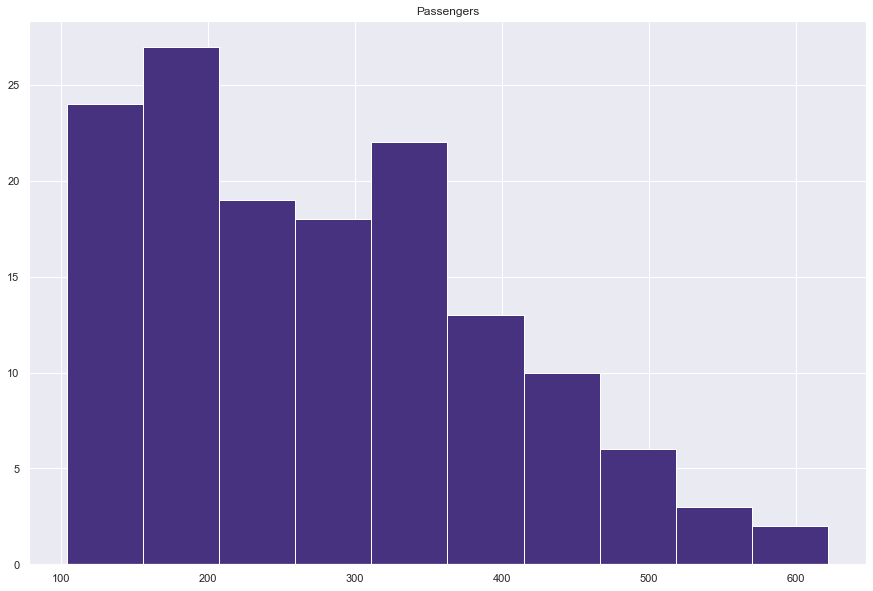

In [95]:
data = pd.read_csv('./res/data/airline_passengers.csv', header=0, index_col=0)
data.hist(figsize=(15,10))
plt.show()

In [96]:
# split the data into 2 evenly
x = data.values # this only works for a series or a dataframe with 1 column
split = round(len(x) /2 )
x1, x2 = x[0:split], x[split:]

In [97]:
#calculate the summary statistics
mean1, mean2 = x1.mean(), x2.mean()
var1, var2 = x1.var(), x2.var()

#print results
print(f'mean1: {mean1}, mean2: {mean2}')
print(f'variance1: {var1}, variance2: {var2}')

mean1: 182.90277777777777, mean2: 377.69444444444446
variance1: 2244.0877700617284, variance2: 7367.962191358024


Reviewing the plot of the time series again, we can see that there is an abvious seasonality component, and it looks like the seasonality component is growing. The may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

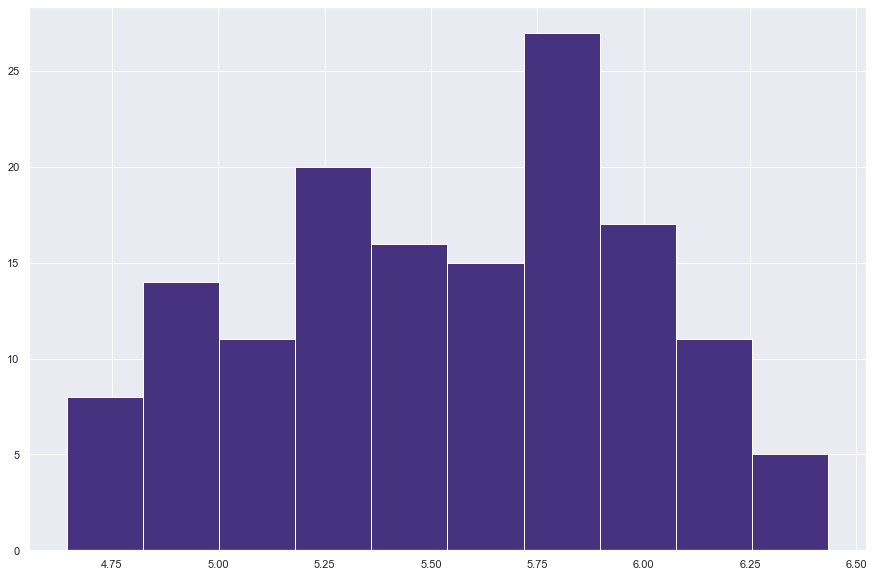

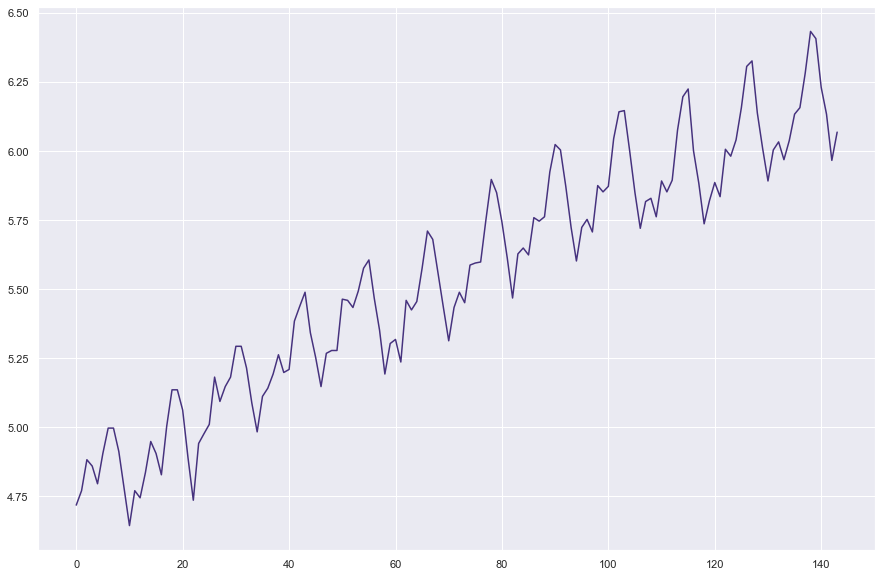

In [98]:
x = np.log(data.values)

# histogram
plt.figure(figsize=(15,10))
plt.hist(x)
plt.show()

# line plot
plt.figure(figsize=(15,10))
plt.plot(x)
plt.show()

In [94]:
split = round(len(x) / 2)
x1, x2 = x[:split], x[split:]
m1, m2 = x1.mean(), x2.mean()
v1, v2 = x1.var(), x2.var()

print(f'Means: {m1:.2f}, {m2:.2f}')
print(f'Variance: {v1:.2f}, {v2:.2f}')

Means: 3.67, 3.78
Variance: 0.03, 0.02


Running the examples shows mean and standard deviation values for each group that are similar but not identical. From these numbers alone, we could say that the time series is stationary, but we strongly believe this to not be the case from reviewing the line plot.

This is a quick and dirty method that may be easily fooled.

We can use a statistical test to check if the difference btween two samples of Gaussian random variables is real or a statistical fluke. We could explore statistical significance tests, like the t-test, but things get tricky because of the serial correlation between values.

# Augmented Dickey-Fuller Test

 Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be regjected or fail to be rejected. The result must be interpreted for a given problem to be meaningful.

 Neverless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

 The **Augmented Dickey-Fuller Test** is a type of statiscal test called a _unit root test_. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. The ADF test uses an autoregressive model and optimizes an information criterion across multiple different lag values.

 The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent struture). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

 We can interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise the null hypothesis is not rejected.

In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
# daily total births 
data = pd.read_csv('./res/data/daily_total_female_births.csv', header=0, index_col=0)
x = data.values
result = adfuller(x)

print(f'ADF Statistic: {result[0]}')
print(f'p-value {result[1]}')
print(f'Critical values:')
for key,value in result[4].items():
    print(f'{key} : {value:.2f}')

ADF Statistic: -4.808291253559762
p-value 5.243412990149882e-05
Critical values:
1% : -3.45
5% : -2.87
10% : -2.57


In [110]:
# airline passengers dataset
data = pd.read_csv('./res/data/airline_passengers.csv', header=0, index_col=0)
x = data.values
result = adfuller(x)

print(f'ADF Statistic: {result[0]}')
print(f'p-value {result[1]}')
print(f'Critical values:')
for key,value in result[4].items():
    print(f'{key} : {value:.2f}')

ADF Statistic: 0.8153688792060507
p-value 0.991880243437641
Critical values:
1% : -3.48
5% : -2.88
10% : -2.58


The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary). Comparing the test statistic to the _critical values_, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent struture.

In [111]:
x = data.values
x = np.log(x)
result = adfuller(x)

print(f'ADF Statistic: {result[0]}')
print(f'p-value {result[1]}')
print(f'Critical values:')
for key,value in result[4].items():
    print(f'{key} : {value:.2f}')

ADF Statistic: -1.7170170891069674
p-value 0.422366774770388
Critical values:
1% : -3.48
5% : -2.88
10% : -2.58


Again, the test statistic is larger than the critical values, meaning that we can fail to reject the null hypothesis and in turn the the time series is non-stationary.